**Intro**

In [1]:
#libs
#from google.colab import drive
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#mount drive
#drive.mount('/content/drive')

#remove treedata.json
def list_folder_contents(folder_path):
    try:
        # List all files and directories in the specified folder
        return os.listdir(folder_path)
    except FileNotFoundError:
        return f"The folder '{folder_path}' does not exist."
    except Exception as e:
        return f"An error occurred: {e}"

# contents is just the list of adressess of the datasets
folder_path = "C:/Users/matheus/Desktop/visual_literacy_of_ai_models/vlat_datasets"
contents = list_folder_contents(folder_path)
element_to_remove = contents[4] # Remove the first element
contents.remove(element_to_remove)
contents

['100_stacked_bar_data.csv',
 'area_data.csv',
 'bar_data.csv',
 'bubble_data.csv',
 'line_data.csv',
 'pie_data.csv',
 'scatterplot_data.csv',
 'stacked_area_data.csv',
 'stacked_bar_data.csv',
 'treemap_data_1.json',
 'unemployment_states.csv']

1. bar_data.csv = CANT DO another one other than non stacked bar - country x speed
2. 'line_data.csv' = can do others - price x month - line, bar, scatter
3. pie_data.csv = can do others - market(number) x company - line is tough but others yes
4.unemployment_states.csv is a case on its own- has to be explored further
5. scatterplot_data.csv is number x number so no bars or pie or line , just scatter
6. stacked area data can be lines, bars, stacked bars and points - its multiple column of number x date
7. stacked_bar_data.csv same as above
8. histogram_data.csv is only one axis - so only hist
9. area_data.csv is number x date - so not stacked bars nor pie, but all the others work

-fix the x axis and y axis to have the names
-take out the unnecessary subtitles when only one colour, column
-fix pie charts

Crude Oil Prices is a line plot
Average Internet Speeds in Asia

Hotel Costs of Room Service is a stacked bar plot that does not go up to 100 percent, its stacked with y value being number

Election Exit Poll of California State by Education Level is also a stacked bar plot - summing up to 100%

Global Smartphone Market Share (%) is a pie chart

Taxi Passenger Ratings is a histogram

Height and Weight of 85 Males is a scatterplot

Average Coffee Bean Price from 2013 to 2014 is one of those plots that make an area

Popular Girls names in the UK is a stacked area

Metro Systems of the World is a complicated scatter plot with

Unemployment Rates for States is supposedly in map format

The number of Unique visitors for websites in 2010


In [2]:
#hashes
#x labels and y labels
plot_type_labels = {
    "bar_data.csv": ["country", "speed"],
    "line_data.csv": ["month", "price"],
    "pie_data.csv": ["company", "market"] , #line could but then its horrible - same as scatter for these name x value
    'unemployment_states.csv' : ["name", "rate"],
    "scatterplot_data.csv" : ["height", "weight"],
    "stacked_area_data.csv" : ["date", "amount of girls with the name"], #multiple columns
    "stacked_bar_data.csv" : ["city", "price ($)"], #multiple columns
    "histogram_data.csv" : ["Taxi Passenger Ratings"],
    "area_data.csv" : ["date", "price"],
    'bubble_data.csv':["Metro Systems of the World"],
     "100_stacked_bar_data.csv" : ["education", "percentage (%)"]

}

dataset_plot_map = {
    "bar_data.csv": ["bar", "scatter"],
    "line_data.csv": ["line", "scatter", "bar"],
    "pie_data.csv": ["scatter", "bar", "pie"] , #line could but then its horrible - same as scatter for these name x value
    'unemployment_states.csv' : ["bar", "scatter"],
    "scatterplot_data.csv" : ["scatter"],
    "stacked_area_data.csv" : ["line", "bar", "stacked_bar", "stacked_bar_100"], #multiple columns
    "stacked_bar_data.csv" : ["stacked_bar"], #multiple columns
    "100_stacked_bar_data.csv" : ["stacked_bar_100"],
    "histogram_data.csv" : ["hist"],
    "area_data.csv" : ["line", "scatter", "bar"],
    'bubble_data.csv':[]
}

''' dataset_plot_title = {
    "bar_data.csv": ["Average Internet Speeds in Asia"],
    "line_data.csv": ["Crude Oil Prices"],
    "pie_data.csv": ["Global Smartphone Market Share"] , #line could but then its horrible - same as scatter for these name x value
    'unemployment_states.csv' : ["Unemployment Rates for States"],
    "scatterplot_data.csv" : ["Height and Weight of 85 Males"],
    "stacked_area_data.csv" : ["Popular Girls names"], #multiple columns
    "stacked_bar_data.csv" : ["Hotel Costs of Room Service"], #multiple columns
    "histogram_data.csv" : ["Taxi Passenger Ratings"],
    "area_data.csv" : ["Average Coffee Bean Price from 2013 to 2014"],
    'bubble_data.csv':["Metro Systems of the World"],
    "100_stacked_bar_data.csv": ['a']

} '''

#x labels and y labels
plot_type_labels = {
    "bar_data.csv": ["country", "speed"],
    "line_data.csv": ["month", "price"],
    "pie_data.csv": ["company", "market"] , #line could but then its horrible - same as scatter for these name x value
    'unemployment_states.csv' : ["name", "rate"],
    "scatterplot_data.csv" : ["height", "weight"],
    "stacked_area_data.csv" : ["date", "amount of girls with the name"], #multiple columns
    "stacked_bar_data.csv" : ["city", "price ($)"], #multiple columns
    "histogram_data.csv" : ["Taxi Passenger Ratings"],
    "area_data.csv" : ["date", "price"],
    'bubble_data.csv':["Metro Systems of the World"]

}

dataset_plot_title_with_variations = {
    "bar_data.csv": [
        "South Korea Leads Internet Speed, HK and Japan follow",
        "Average Internet Speeds in Asia"
    ],
    "line_data.csv": [
        "Monthly Oil Price History in 2015",
        "Oil Prices Spike Between April and June"
    ],
    "pie_data.csv": [
        "Global Smartphone Market Share (%)",
        "Samsung Leads, Apple Second in Global Phone Market Share"
    ],
    'unemployment_states.csv': [
        "Unemployment Rates",
        "Unemployment Rates by U.S. State",
        "State-by-State Unemployment Rates and Economic Trends in the United States for 2024"
    ],
    "scatterplot_data.csv": [
        "Height vs. Weight of 85 Males",
        "Slightly Positive Correlation Between Men's Height and Weight"
    ],
    "stacked_area_data.csv": [
        "Popular Girls' Names in the UK",
        "Amelia Leads Girls Names for Almost a Decade"
    ],
    "stacked_bar_data.csv": [
        "Hotel Costs of Room Service",
        "NY and Vegas Have Most Expensive Room Services, Seattle Cheapest"
    ],
    "histogram_data.csv": [
        "Taxi Passenger Ratings",
        "4.4 to 4.6 Are The Most Common Taxi Passenger Ratings"
    ],
    "area_data.csv": [
        "Average Coffee Bean Price from 2013 to 2014",
        "Coffee Bean Price Dropped from 2013 High to 2014 Low"
    ],
    'bubble_data.csv': [
        "Metro Systems",
        "Metro Systems of the World",
        "Global Metro Systems: Network Growth, Urbanization, and Infrastructure Development"
    ],
    "100_stacked_bar_data.csv": ["Election Exit Poll of California State by Education",
                                 "Democrats in CA Shine With No Diplomas and Postgrads"]
}


In [ ]:
# fixing the histogram problem with new data
# import pandas as pd
#something = pd.read_csv("C:/Users/matheus/Desktop/visual_literacy_of_ai_models/vlat_datasets/histogram_data.csv")
#something[["rating"]] = something[["close"]]
#something = something.drop(columns="close")
#something.to_csv("C:/Users/matheus/Desktop/visual_literacy_of_ai_models/vlat_datasets/histogram_data.csv")

In [3]:
#functions
def generate_plot_config(output_folder, plot_types=None, colors=None, titles=None, subtitles=None, datasets=None, dataset_plot_map=None, dataset_title_map=None):
    """
    Generates a list of dictionaries with plot configurations and saves plot images.

    Args:
        plot_types (list, optional): List of plot types. Defaults to None.
        colors (list, optional): List of colors. Defaults to None.
        titles (list, optional): List of titles. Defaults to None.
        subtitles (list, optional): List of subtitles. Defaults to None.
        datasets (list, optional): List of dataset names. Defaults to None.
        dataset_plot_map (dict, optional): Mapping of datasets to allowed plot types. Defaults to None.
        output_folder (str, optional): Folder to save generated plots. Defaults to "plots".

    Returns:
        list: A list of dictionaries, each representing a plot configuration.
    """
    plot_types = plot_types or ["bar", "line", "scatter"]
    colors = colors or ["red"]  # Extendable color list
    titles = titles or ["Title 1"]  # Extendable title list
    subtitles = subtitles or ["Subtitle 1"]  # Extendable subtitle list
    datasets = datasets or contents
    dataset_plot_map = dataset_plot_map or {
        "Dataset 1": ["bar"],
        "Dataset 2": ["line", "scatter"],
        "Dataset 3": ["scatter"]
    }

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    configs = []
    for dataset in datasets:
        print("doing this dataset: "+dataset)
        allowed_plot_types = dataset_plot_map.get(dataset, plot_types)  # Default to all plot types if not specified
        dataset_titles = dataset_title_map.get(dataset, "No title")
        for plot_type in allowed_plot_types:
            print("doing this plot type: "+plot_type)
            for color in colors:
                #print(color, "here is one color")
                for title in dataset_titles:
                    for subtitle in subtitles:
                        config = {
                            "plot_type": plot_type,
                            "color": color, #now this will become a list
                            "title": title,
                            "subtitle": subtitle,
                            "dataset": dataset
                        }
                        configs.append(config)

                        # Save the plot to the folder
                        try:
                            save_plot(config, output_folder)
                        except Exception as e:
                            print(f"Failed to save plot for {config}: {e}")
                            continue

    return configs



#this function saves plots with the faulty y axis 
def save_plot(config, output_folder, datasets_folder="C:/Users/matheus/Desktop/visual_literacy_of_ai_models/vlat_datasets"):

    plt.figure(figsize=(22, 16))

    # Attempt to load the dataset
    dataset_path = os.path.join(datasets_folder, f"{config['dataset']}")
    try:
        data = pd.read_csv(dataset_path)
    except Exception as e:
        print(f"Failed to load dataset '{dataset_path}': {e}")
        return  # Fail silently and skip this plot

    # Process the dataset columns
    try:
        if data.shape[1] < 2 and config['dataset'] != "histogram_data.csv":
            print(f"Dataset '{config['dataset']}' must have at least two columns.")
            return  # Fail silently and skip this plot

        # Use the first column as x, and the rest as y
        x = data.iloc[:, 0]
        x_label = data.columns[0]  # Name of the x column
        y_columns = data.columns[1:]  # Remaining columns
    except Exception as e:
        print(f"Failed to process dataset columns for '{config['dataset']}': {e}")
        return  # Fail silently and skip this plot

    # Generate the plot based on the configuration
    try:
        colors = config.get("color", ["cornflowerblue", "orange", "green", "red", "purple", "pink", "gray"])  # Default color palette

        print("using this colors to make the plot:", colors)
        # Determine the color usage based on plot type
        if config["plot_type"] in ["line", "hist"] and len(y_columns) == 1:
            colors = colors[0]  # Use the first color for single-line or histogram plots

        if config["plot_type"] == "bar":
            # Standard stacked bar plot
            bottom = np.zeros(len(x))
            for i, col in enumerate(y_columns):
                plt.bar(x, data[col], bottom=bottom, label=col, color=colors[i % len(colors)], alpha=0.8)
                bottom += data[col]

        elif config["plot_type"] == "stacked_bar_100":
            # Stacked bar normalized to 100%
            y_data = data[y_columns]
            normalized_data = y_data.div(y_data.sum(axis=1), axis=0) * 100
            bottom = np.zeros(len(x))
            for i, col in enumerate(y_columns):
                plt.bar(x, normalized_data[col], bottom=bottom, label=col, color=colors[i % len(colors)], alpha=0.8)
                bottom += normalized_data[col]

        elif config["plot_type"] == "line":
            if len(y_columns) > 1:
                for i, col in enumerate(y_columns):
                    plt.plot(x, data[col], label=col, color=colors[i % len(colors)])
            else:
                plt.plot(x, data[y_columns[0]], label=y_columns[0], color=colors)

        elif config["plot_type"] == "stacked_bar":
            categories = data.iloc[:, 0]
            stacks = data.iloc[:, 1:].values
            stack_labels = data.columns[1:]  # Get column names for the stacks
            indices = np.arange(len(categories))
    
            for i in range(stacks.shape[1]):
                plt.bar(
                indices,
                stacks[:, i],
                bottom=stacks[:, :i].sum(axis=1),
                color=colors[i % len(colors)],
                label= "price of "+stack_labels[i]  # Use column name instead of "Stack {i+1}"
            )
    
            plt.xticks(indices, categories)
            plt.legend()
        
        elif config["plot_type"] == "stacked_area":
            categories = data.iloc[:, 0]
            stacks = data.iloc[:, 1:].values
            stack_labels = data.columns[1:]  # Get column names for the stacks

            plt.stackplot(categories, stacks.T, labels=stack_labels, colors=[colors[i % len(colors)] for i in range(stacks.shape[1])])

            plt.xticks(rotation=45)  # Rotate if categories are long
            plt.legend()


        elif config["plot_type"] == "scatter":
            for i, col in enumerate(y_columns):
                plt.scatter(x, data[col], label=col, color=colors[i % len(colors)])

        elif config["plot_type"] == "hist":
            y_data = data.iloc[:, 1]  # Use the first column for histogram
            bins = config.get("bins", 10)  # Default to 10 bins
            alpha = config.get("alpha", 0.8)  # Transparency

            plt.hist(y_data, bins=bins, color=colors[0], alpha=alpha, label="frequency")
            plt.legend()



        elif config["plot_type"] == "pie":
            if len(y_columns) != 1:
                print("Pie chart requires exactly one data column.")
                return

            values = data[y_columns[0]]
            labels = x

            plt.pie(values, labels=labels, colors=colors[:len(values)], autopct='%1.1f%%', startangle=90)
            plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        else:
            print(f"Unsupported plot type '{config['plot_type']}'.")
            return  # Fail silently and skip this plot

        # Add labels, title, legend, etc.
        plt.subplots_adjust(bottom=0.5)
        plt.title(f"{config['title']}")
        if config["plot_type"] not in ["pie", "hist"]:
            plt.xlabel(x_label)  # Use the name of the x column
            plt.ylabel("Values") #this forces it to always misslabel
        if config["plot_type"] == "hist":
            plt.xlabel("rating")  # Use the name of the x column

        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        plt.legend()

        # Save the plot image
        filename = f"{config['dataset']}_{config['plot_type']}_{config['title'].replace(' ', '_')}_{config['color'][0]}.png"
        filepath = os.path.join(output_folder, filename)
        plt.savefig(filepath)
        plt.close()
    except Exception as e:
        print(f"Failed to generate plot for config {config}: {e}")
        plt.close()


this function below generates the plots as well as possible

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def save_plot(config, output_folder, datasets_folder="C:/Users/matheus/Desktop/visual_literacy_of_ai_models/vlat_datasets"):
    plt.figure(figsize=(10, 10))

    dataset_path = os.path.join(datasets_folder, f"{config['dataset']}")
    try:
        data = pd.read_csv(dataset_path)
    except Exception as e:
        print(f"Failed to load dataset '{dataset_path}': {e}")
        return 

    try:
        if data.shape[1] < 2 and config['dataset'] != "histogram_data.csv":
            print(f"Dataset '{config['dataset']}' must have at least two columns.")
            return 

        x = data.iloc[:, 0]
        x_label = data.columns[0]  
        y_columns = data.columns[1:]  
        y_label = ", ".join(y_columns)  
    except Exception as e:
        print(f"Failed to process dataset columns for '{config['dataset']}': {e}")
        return 

    try:
        colors = config.get("color", ["cornflowerblue", "orange", "green", "red", "purple", "pink", "gray"])
        print("Using these colors to make the plot:", colors)

        if config["plot_type"] in ["line", "hist"] and len(y_columns) == 1:
            colors = colors[0]  

        if config["plot_type"] == "stacked_bar_100":
            y_label = "Percentage(%)" if config['dataset'] == "100_stacked_bar_data.csv" else "Percentage(%)"
            x_label = "Education" if config['dataset'] == "100_stacked_bar_data.csv" else x_label
            y_data = data[y_columns]
            normalized_data = y_data.div(y_data.sum(axis=1), axis=0) * 100
            bottom = np.zeros(len(x))
            for i, col in enumerate(y_columns):
                plt.bar(x, normalized_data[col], bottom=bottom, label=col, color=colors[i % len(colors)], alpha=0.8)
                bottom += normalized_data[col]

        elif config["plot_type"] == "hist":
            x_label = "Ratings"
            y_data = data.iloc[:, 1]
            bins = config.get("bins", 10)
            alpha = config.get("alpha", 0.8)
            plt.hist(y_data, bins=bins, color=colors, alpha=alpha)
            y_label = "Frequency"

        elif config["plot_type"] == "stacked_bar_100" and config['dataset'] == "stacked_area_data.csv":
            y_label = "Percentage(%)"
            x_label = "Year"
            categories = data.iloc[:, 0]
            stacks = data.iloc[:, 1:].values
            stack_labels = data.columns[1:]
            plt.stackplot(categories, stacks.T, labels=stack_labels, colors=[colors[i % len(colors)] for i in range(stacks.shape[1])])
            plt.xticks(rotation=45)
        
        elif config["plot_type"] != "stacked_bar_100" and config['dataset'] == "stacked_area_data.csv":
            y_label = "Number of girls"
            x_label= "Year" 
            categories = data.iloc[:, 0]
            stacks = data.iloc[:, 1:].values
            stack_labels = data.columns[1:]
            plt.stackplot(categories, stacks.T, labels=stack_labels, colors=[colors[i % len(colors)] for i in range(stacks.shape[1])])
            plt.xticks(rotation=45)

        elif config["plot_type"] == "stacked_bar":
            y_label = "Price (US$)" if config['dataset'] == "stacked_bar_data.csv" else y_label
            categories = data.iloc[:, 0]
            stacks = data.iloc[:, 1:].values
            stack_labels = data.columns[1:]
            indices = np.arange(len(categories))
            for i in range(stacks.shape[1]):
                plt.bar(indices, stacks[:, i], bottom=stacks[:, :i].sum(axis=1), color=colors[i % len(colors)], label=stack_labels[i])
            plt.xticks(indices, categories)

        elif config["plot_type"] == "bar":
            bottom = np.zeros(len(x))
            for i, col in enumerate(y_columns):
                plt.bar(x, data[col], bottom=bottom, label=col, color=colors[i % len(colors)], alpha=0.8)
                bottom += data[col]
            if config["dataset"] == "area_data.csv":
                y_label = "Price (US$)"
                x_label = "Date"
            if config["dataset"] == "bar_data.csv":
                y_label = "Speed (mbps)"
                x_label = "Country"
            if config["dataset"] == "pie_data.csv":
                y_label = "Market Share(%)"
                x_label = "Company"



        elif config["plot_type"] == "line":
            if len(y_columns) > 1:
                for i, col in enumerate(y_columns):
                    plt.plot(x, data[col], label=col, color=colors[i % len(colors)])
            else:
                plt.plot(x, data[y_columns[0]], color=colors)
            if config["dataset"] == "area_data.csv":
                x_label = "Price (US$)"
                y_label = "Date"

        elif config["plot_type"] == "scatter":
            for i, col in enumerate(y_columns):
                plt.scatter(x, data[col], label=col, color=colors[i % len(colors)])
            if config["dataset"] == "pie_data.csv":
                y_label = "Market Share(%)"
                x_label = "Company"
            if config["dataset"] == "scatterplot_data.csv":
                y_label = "Weight (kg)"
                x_label = "Height (cm)"
            if config["dataset"] == "area_data.csv":
                y_label = "Price (US$)"
                x_label = "Date"    
            if config["dataset"] == "bar_data.csv":
                y_label = "Speed (mbps)"
                x_label = "Country"  

        elif config["plot_type"] == "pie":
            if len(y_columns) != 1:
                print("Pie chart requires exactly one data column.")
                return
            values = data[y_columns[0]]
            y_label=""
            x_label= ""
            labels = x
            plt.pie(values, labels=labels, colors=colors[:len(values)], autopct='%1.1f%%', startangle=90)
            plt.axis('equal')


        else:
            print(f"Unsupported plot type '{config['plot_type']}'.")
            return 

        if config["dataset"] == "line_data.csv":
            x_label = "Month"
            y_label = "Price (US$)"
        plt.subplots_adjust(bottom=0.5)
        plt.title(f"{config['title']}")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)

        if config["plot_type"] not in ["hist", "pie"] and config['dataset'] not in ["area_data.csv", "line_data.csv", "scatterplot_data.csv", "bar_data.csv", "pie_data.csv"]:
            plt.legend()

        
        filename = f"{config['dataset']}_{config['plot_type']}_{config['title'].replace(' ', '_')}_{config['color'][0]}.png"
        filepath = os.path.join(output_folder, filename)
        plt.savefig(filepath)
        plt.close()
    except Exception as e:
        print(f"Failed to generate plot for config {config}: {e}")
        plt.close()


function generates datasets from config files

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

def generate_dataset(config_list):
    records = []
    
    with open(config_list, "r") as file:
        ready_config_list = json.load(file)
    for config in ready_config_list:
        
        filename = f"{config['dataset']}_{config['plot_type']}_{config['title'].replace(' ', '_')}_{config['color'][0]}.png"
        
        record = {
            "filename": filename,
            "dataset": config["dataset"],
            "plot_type": config["plot_type"],
            "title": config["title"],
            "color": config["color"][0]
        }
        records.append(record)
    
    df = pd.DataFrame(records)
    return df

# Example usage:

#df = generate_dataset("C:/Users/matheus/Desktop/visual_literacy_of_ai_models/configsGenerated.json")
#df.to_csv("referenceDatasetForGeneratedPlots.csv")


In [3]:
def check_json_elements(filepath):
    """
    Opens a JSON file, checks its size, and counts the number of elements.

    Args:
        filepath (str): The path to the JSON file.

    Returns:
        tuple: A tuple containing the file size (in bytes) and the number of elements in the JSON data (if successful), or None if an error occurs.
    """
    try:
        file_size = os.path.getsize(filepath)
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)

        if isinstance(data, list):
            element_count = len(data)
        elif isinstance(data, dict):
            element_count = len(data)
        else:
            element_count = 1 #for single values, strings, numbers, etc.

        return file_size, element_count
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {filepath}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [4]:
check_json_elements("configsGenerated.json")

(157547, 380)

In [ ]:
import os

for filename in os.listdir("C:/Users/matheus/Desktop/visual_literacy_of_ai_models/official_plots_with_no_faults3"):
    try:
        filename.encode("ascii")  # Try encoding to ASCII
        print("ok")
    except UnicodeEncodeError:
        print(f"Problematic filename: {filename}")


this save plot function is not consistently doing the wrong thing wrong: first lets make it fuck up the y axis consistently, which means harm it but not make unusable like it is now

which ones are not usable: 1)stacked_bar_data 2)stacked_area data and 3)histogram_data

In [4]:
#not working still
#'unemployment_states.csv' : ["bar", "scatter"], #not handling the columns properly
#"histogram_data.csv" : ["hist"], #no tech for hist
#'bubble_data.csv':[]

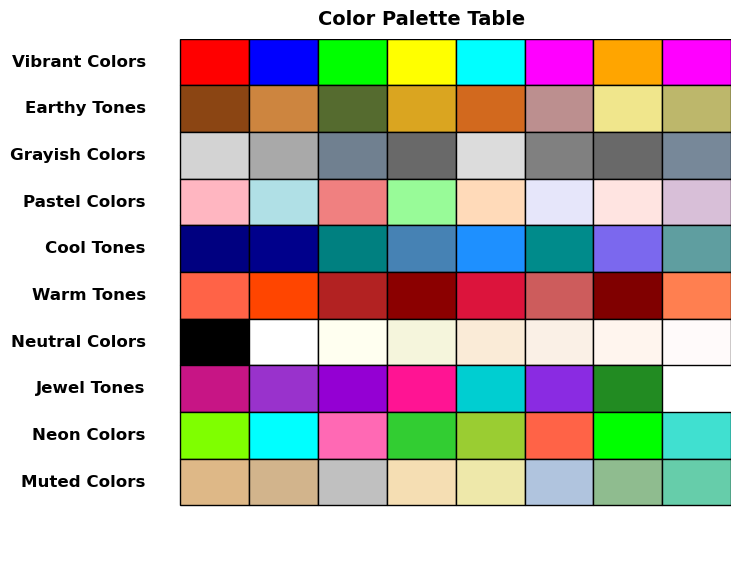

In [1]:
import matplotlib.pyplot as plt

# List of color sets
color_sets = [
    # Vibrant Colors
    ["red", "blue", "lime", "yellow", "cyan", "magenta", "orange", "fuchsia"],

    # Earthy Tones
    ["saddlebrown", "peru", "darkolivegreen", "goldenrod", "chocolate", "rosybrown", "khaki", "darkkhaki"],

    # Grayish Colors
    ["lightgray", "darkgray", "slategray", "dimgray", "gainsboro", "gray", "dimgrey", "lightslategray"],

    # Pastel Colors
    ["lightpink", "powderblue", "lightcoral", "palegreen", "peachpuff", "lavender", "mistyrose", "thistle"],

    # Cool Tones
    ["navy", "darkblue", "teal", "steelblue", "dodgerblue", "darkcyan", "mediumslateblue", "cadetblue"],

    # Warm Tones
    ["tomato", "orangered", "firebrick", "darkred", "crimson", "indianred", "maroon", "coral"],

    # Neutral Colors
    ["black", "white", "ivory", "beige", "antiquewhite", "linen", "seashell", "snow"],

    # Jewel Tones
    ["mediumvioletred", "darkorchid", "darkviolet", "deeppink", "darkturquoise", "blueviolet", "forestgreen"],

    # Neon Colors
    ["chartreuse", "aqua", "hotpink", "limegreen", "yellowgreen", "#FF6347", "#00FF00", "#40E0D0"],

    # Muted Colors
    ["burlywood", "tan", "silver", "wheat", "palegoldenrod", "lightsteelblue", "darkseagreen", "mediumaquamarine"]
]

# Palette names
palette_names = [
    "Vibrant Colors", "Earthy Tones", "Grayish Colors", "Pastel Colors", "Cool Tones",
    "Warm Tones", "Neutral Colors", "Jewel Tones", "Neon Colors", "Muted Colors"
]

# Determine the number of rows and columns
n_palettes = len(color_sets)
max_colors = max(len(colors) for colors in color_sets)

# Create figure and axis
fig, ax = plt.subplots(figsize=(max_colors, n_palettes / 1.5))  # Adjust size dynamically

# Hide axis
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Draw color rows
for row_idx, (palette_name, colors) in enumerate(zip(palette_names, color_sets)):
    for col_idx, color in enumerate(colors):
        rect = plt.Rectangle((col_idx, -row_idx), 1, 1, color=color, transform=ax.transData, ec="black")
        ax.add_patch(rect)
    
    # Add palette name on the left
    ax.text(-0.5, -row_idx + 0.5, palette_name, va='center', ha='right', fontsize=12, fontweight='bold')

# Adjust limits and display
ax.set_xlim(-1, max_colors)
ax.set_ylim(-n_palettes, 1)
plt.title("Color Palette Table", fontsize=14, fontweight="bold", pad=10)
plt.show()


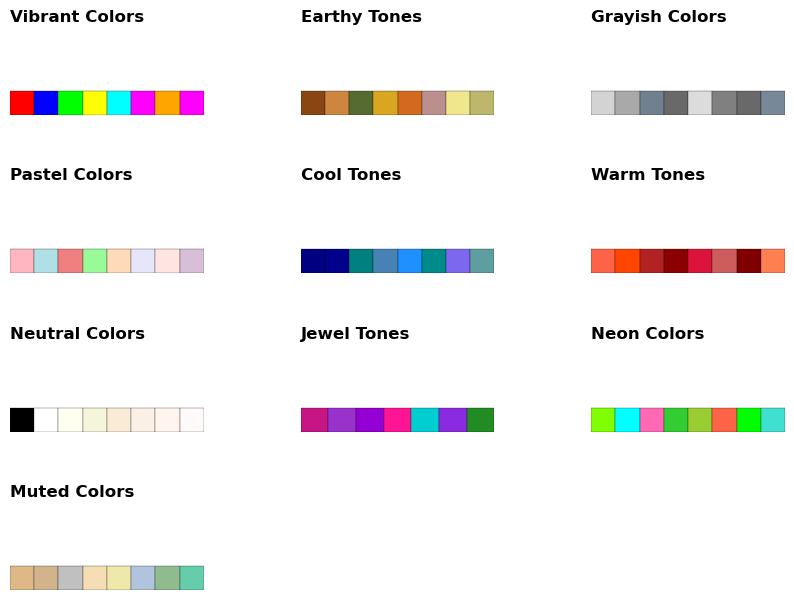

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define color palettes
color_sets = {
    "Vibrant Colors": ["red", "blue", "lime", "yellow", "cyan", "magenta", "orange", "fuchsia"],
    "Earthy Tones": ["saddlebrown", "peru", "darkolivegreen", "goldenrod", "chocolate", "rosybrown", "khaki", "darkkhaki"],
    "Grayish Colors": ["lightgray", "darkgray", "slategray", "dimgray", "gainsboro", "gray", "dimgrey", "lightslategray"],
    "Pastel Colors": ["lightpink", "powderblue", "lightcoral", "palegreen", "peachpuff", "lavender", "mistyrose", "thistle"],
    "Cool Tones": ["navy", "darkblue", "teal", "steelblue", "dodgerblue", "darkcyan", "mediumslateblue", "cadetblue"],
    "Warm Tones": ["tomato", "orangered", "firebrick", "darkred", "crimson", "indianred", "maroon", "coral"],
    "Neutral Colors": ["black", "white", "ivory", "beige", "antiquewhite", "linen", "seashell", "snow"],
    "Jewel Tones": ["mediumvioletred", "darkorchid", "darkviolet", "deeppink", "darkturquoise", "blueviolet", "forestgreen"],
    "Neon Colors": ["chartreuse", "aqua", "hotpink", "limegreen", "yellowgreen", "#FF6347", "#00FF00", "#40E0D0"],
    "Muted Colors": ["burlywood", "tan", "silver", "wheat", "palegoldenrod", "lightsteelblue", "darkseagreen", "mediumaquamarine"]
}

# Set up a 3-column grid
num_cols = 3
num_rows = int(np.ceil(len(color_sets) / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 1.8))
fig.subplots_adjust(hspace=1, wspace=0.5)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each color set
for i, (palette_name, colors) in enumerate(color_sets.items()):
    ax = axes[i]
    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(palette_name, fontsize=12, fontweight='bold', loc='left', pad=10)


    # Draw color swatches
    for j, color in enumerate(colors):
        ax.add_patch(plt.Rectangle((j, 0), 1, 0.3, color=color, ec="black", lw=0.2))
    
    # Remove axis borders
    for spine in ax.spines.values():
        spine.set_visible(False)

# Hide empty subplots
for i in range(len(color_sets), len(axes)):
    fig.delaxes(axes[i])

plt.savefig("color_palette_grid2.svg")
plt.show()


In [7]:
#im gonna create some color sets, so that it will vary over the plot types, the titles and the color sets
color_sets = [
    # Vibrant Colors
    ["red", "blue", "lime", "yellow", "cyan", "magenta", "orange", "fuchsia"],

    # Earthy Tones
    ["saddlebrown", "peru", "darkolivegreen", "goldenrod", "chocolate", "rosybrown", "khaki", "darkkhaki"],

    # Grayish Colors
    ["lightgray", "darkgray", "slategray", "dimgray", "gainsboro", "gray", "dimgrey", "lightslategray"],

    # Pastel Colors
    ["lightpink", "powderblue", "lightcoral", "palegreen", "peachpuff", "lavender", "mistyrose", "thistle"],

    # Cool Tones
    ["navy", "darkblue", "teal", "steelblue", "dodgerblue", "darkcyan", "mediumslateblue", "cadetblue"],

    # Warm Tones
    ["tomato", "orangered", "firebrick", "darkred", "crimson", "indianred", "maroon", "coral"],

    # Neutral Colors
    ["black", "white", "ivory", "beige", "antiquewhite", "linen", "seashell", "snow"],

    # Jewel Tones
    ["mediumvioletred", "darkorchid", "darkviolet", "deeppink", "darkturquoise", "blueviolet", "forestgreen"],

    # Neon Colors
    ["chartreuse", "aqua", "hotpink", "limegreen", "yellowgreen", "#FF6347", "#00FF00", "#40E0D0"],

    # Muted Colors
    ["burlywood", "tan", "silver", "wheat", "palegoldenrod", "lightsteelblue", "darkseagreen", "mediumaquamarine"]
]

i have made them perfect, and ran gpt on it, and i have made them test8 and ran both gpt and google

now i need to run google on the perfect
and make them fail axis x, fail axis y (but being mindful of what we did with test8 not to repeat everything)
i could make other variants too, like background and such

In [ ]:
#testing the creation of plots area

!mkdir "official_plots_with_no_faults8"
new_configs =  generate_plot_config("C:/Users/matheus/Desktop/visual_literacy_of_ai_models/official_plots_with_no_faults8", plot_types = ["bar","line", "stacked_bar_100", "pie", "stacked_bar", "scatter", "hist"], #plot types is just which ones we allow, in this case, all
                                      dataset_plot_map=dataset_plot_map,
                     dataset_title_map=dataset_plot_title_with_variations
                                      ,datasets=['line_data.csv',
 'bar_data.csv',
 'stacked_bar_data.csv',
 '100_stacked_bar_data.csv',
 'pie_data.csv',
 'histogram_data.csv',
 'scatterplot_data.csv',
 'area_data.csv',
 'stacked_area_data.csv'
 #'bubble_data.csv' must stay like this
 #'unemployment_states.csv' must stay like this
                                                 ]
                                      ,colors=color_sets)



doing this dataset: line_data.csv
doing this plot type: line
Using these colors to make the plot: ['red', 'blue', 'lime', 'yellow', 'cyan', 'magenta', 'orange', 'fuchsia']
Using these colors to make the plot: ['red', 'blue', 'lime', 'yellow', 'cyan', 'magenta', 'orange', 'fuchsia']
Using these colors to make the plot: ['saddlebrown', 'peru', 'darkolivegreen', 'goldenrod', 'chocolate', 'rosybrown', 'khaki', 'darkkhaki']
Using these colors to make the plot: ['saddlebrown', 'peru', 'darkolivegreen', 'goldenrod', 'chocolate', 'rosybrown', 'khaki', 'darkkhaki']
Using these colors to make the plot: ['lightgray', 'darkgray', 'slategray', 'dimgray', 'gainsboro', 'gray', 'dimgrey', 'lightslategray']
Using these colors to make the plot: ['lightgray', 'darkgray', 'slategray', 'dimgray', 'gainsboro', 'gray', 'dimgrey', 'lightslategray']
Using these colors to make the plot: ['lightpink', 'powderblue', 'lightcoral', 'palegreen', 'peachpuff', 'lavender', 'mistyrose', 'thistle']
Using these colors to 

In [9]:
new_configs

[{'plot_type': 'line',
  'color': ['red',
   'blue',
   'lime',
   'yellow',
   'cyan',
   'magenta',
   'orange',
   'fuchsia'],
  'title': 'Monthly Oil Price History in 2015',
  'subtitle': 'Subtitle 1',
  'dataset': 'line_data.csv'},
 {'plot_type': 'line',
  'color': ['red',
   'blue',
   'lime',
   'yellow',
   'cyan',
   'magenta',
   'orange',
   'fuchsia'],
  'title': 'Oil Prices Spike Between April and June',
  'subtitle': 'Subtitle 1',
  'dataset': 'line_data.csv'},
 {'plot_type': 'line',
  'color': ['saddlebrown',
   'peru',
   'darkolivegreen',
   'goldenrod',
   'chocolate',
   'rosybrown',
   'khaki',
   'darkkhaki'],
  'title': 'Monthly Oil Price History in 2015',
  'subtitle': 'Subtitle 1',
  'dataset': 'line_data.csv'},
 {'plot_type': 'line',
  'color': ['saddlebrown',
   'peru',
   'darkolivegreen',
   'goldenrod',
   'chocolate',
   'rosybrown',
   'khaki',
   'darkkhaki'],
  'title': 'Oil Prices Spike Between April and June',
  'subtitle': 'Subtitle 1',
  'dataset': 

In [10]:
import json
#save that shit
data = new_configs


# Path to save the JSON file
output_path = "newConfigs.json"

# Save the dictionary as a JSON file
with open(output_path, "w") as json_file:
    json.dump(data, json_file, indent=4)

So then with all the viz we do the VLAT with them

In [ ]:
#import openai
#!pip install --upgrade openai
#!pip install --force-reinstall -v "openai==1.55.3" # THIS ONE HAS TO BE RUN OTHERWISE PROXIES ERROR

from openai import OpenAI
from PIL import Image
import io
import base64
import os
# Set your API key
os.environ["OPENAI_API_KEY"] = "your-key"

client = OpenAI()

In [ ]:
import time
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')


def ask_openai_with_visualization(image_path, question):
    """
    Uses OpenAI's API to answer a question based on a visualization.

    Args:
        image_path (str): Path to the visualization image.
        question (str): The question related to the visualization.
        api_key (str): OpenAI API key.

    Returns:
        str: The answer to the question.
    """


    # Load and encode the image
    # Getting the base64 string
    base64_image = encode_image(image_path)

    # Send the image and question to OpenAI
    try:
        # Step 1: Upload the image to a suitable model (e.g., OpenAI's multimodal capabilities)
        # This assumes GPT-4 vision (if available)
        response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": question},
                {
                    "type": "image_url",
                    "image_url": {
                        "url":  f"data:image/jpeg;base64,{base64_image}",
                    }
                },
            ],
        },
        {"role": "system",
         "content":[
             {"type": "text", "text": "Respond only with the exact text provided in the options, in the exact way its there. If not possible to respond clearly, choose 'Omit'"}
         ]}
    ],
    max_tokens=300,
)

        # Extract and return the answer
        #answer = response['choices'][0]['message']['content']
        # Introduce a small delay before returning the result
        time.sleep(2)
        return response.choices[0].message.content

    except Exception as e:
        return f"An error occurred: {e}"


with time measuring

In [9]:
import time
import base64

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def ask_openai_with_visualization(image_path, question):
    """
    Uses OpenAI's API to answer a question based on a visualization.

    Args:
        image_path (str): Path to the visualization image.
        question (str): The question related to the visualization.

    Returns:
        tuple: (answer, time_taken)
    """
    start_time = time.time()  # Start timing

    # Load and encode the image
    base64_image = encode_image(image_path)

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": question},
                        {
                            "type": "image_url",
                            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                        },
                    ],
                },
                {
                    "role": "system",
                    "content": [
                        {"type": "text", "text": "Respond only with the exact text provided in the options, in the exact way it's there. If not possible to respond clearly, choose 'Omit'."}
                    ],
                }
            ],
            max_tokens=300,
        )

        answer = response.choices[0].message.content

    except Exception as e:
        answer = f"An error occurred: {e}"

    time_taken = time.time() - start_time  # Calculate elapsed time

    return answer, time_taken  # Return both answer and time taken


Creating paralels to other LLMs

In [ ]:
#pip install -q -U google-generativeai

import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="your-other-key")

c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#criando um objeto modelo
google_model = genai.GenerativeModel('gemini-1.5-flash')


In [12]:
#google_model.generate_content(" CS ed at UIUC").text

import PIL.Image


import time

def ask_google_gemini_with_visualization(image_path, question, delay=2):
    """Queries Google Gemini with an image and a question, adding a delay between calls."""
    # Load the image
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    # Create the prompt with both system prompt and user prompt
    content_parts = [
        {
            "text": "Respond only with the exact text provided in the options, in the exact way it's there. If not possible to respond clearly, choose 'Omit'."
        },
        {
            "mime_type": "image/jpeg",  # Change if your image is different
            "data": image_data
        },
        question
    ]

    response = google_model.generate_content(content_parts)
    print("i answered a question related to ", image_path)

    # Remove newline characters
    cleaned_text = response.text.replace('\n', ' ')  # Replace newlines with spaces

    # Introduce a small delay before returning the result
    time.sleep(2)

    return cleaned_text





In [13]:
import time

def ask_google_gemini_with_visualization(image_path, question):
    """Queries Google Gemini with an image and a question, adding a delay between calls."""
    start_time = time.time()
    
    # Load the image
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    # Create the prompt with both system prompt and user prompt
    content_parts = [
        {
            "text": "Respond only with the exact text provided in the options, in the exact way it's there. If not possible to respond clearly, choose 'Omit'."
        },
        {
            "mime_type": "image/jpeg",  # Change if your image is different
            "data": image_data
        },
        question
    ]

    response = google_model.generate_content(content_parts)

    # Remove newline characters
    cleaned_text = response.text.replace('\n', ' ')  # Replace newlines with spaces

    elapsed_time = time.time() - start_time
    
    # Introduce a small delay before returning the result
    time.sleep(2)

    return cleaned_text


Testing openai

In [16]:
import openai
# Example Usage
if __name__ == "__main__":
    # Path to your visualization image
    #image_path ="/official_plots_with_no_faults8/100_stacked_bar_data.csv_stacked_bar_100_Democrats_in_CA_shine_with_no_diplomas_and_postgrads_chartreuse.png"
    #image_path = "official_plots_with_no_faults2\stacked_area_data.csv_stacked_bar_100_Amelia_Leads_Girls_Names_for_Almost_a_Decade_red.png"
    image_path = "official_plots_with_no_faults8/100_stacked_bar_data.csv_stacked_bar_100_Democrats_in_CA_Shine_With_No_Diplomas_and_Postgrads_burlywood.png"
    question = "What is the approval rating of Republicans among the people who have the education level of Postgraduate Study? 38%, 47%, 53%, 62%, Omit"

    answer = ask_google_gemini_with_visualization(image_path, question)
    print(answer)


i answered a question related to  official_plots_with_no_faults8/100_stacked_bar_data.csv_stacked_bar_100_Democrats_in_CA_Shine_With_No_Diplomas_and_Postgrads_burlywood.png
Omit 


In [14]:
#get the vlat questions - there are multiple i for
dataset_plot_questions_asked = {
    "line_data.csv": ["What was the price of a barrel of oil in February 2015? Options: $57.36, $47.82, $50.24, $39.72, Omit",
                      "In which month was the price of a barrel of oil the lowest in 2015? Options: March, May, July,December, Omit",
                      "What was the price range of a barrel of oil in 2015? Options: $35 - $65, $48.36 - $60.95, $37.04 - $48.36, $37.04 - $60.95, Omit",
                      "Over the course of the second half of 2015, the price of a barrel of oil was ____________. Options: rising, falling, staying, Omit",
                      "About how much did the price of a barrel of oil fall from April to September in 2015? Options: $4, $15, $17, $45, Omit"],
    "bar_data.csv":  ["What is the average internet speed in Japan? Options: 10 Mbps, 14 Mbps, 15 Mbps, 16 Mbps, Omit",
                      "In which country is the average internet speed the fastest in Asia? Options: China, Hong Kong, South Korea, Vietnam, Omit",
                      "What is the range of the average internet speed in Asia? Options: 0 - 22 Mbps, 2 - 20.5 Mbps, 3 - 20 Mbps, 3.4 - 7.8 Mbps, Omit",
                      "How many countries in Asia is the average internet speed slower than Thailand? Options: 5 countries, 6 countries, 7 countries, 8 countries, Omit"],
    "stacked_bar_data.csv" : ["What is the cost of peanuts in Las Vegas? Options: $12, $16.7, $23.4, $35.4, Omit",
                              "About what is the ratio of the cost of a sandwich to the total cost of room service in Seattle? Options: 1 to 10, 2 to 10, 4 to 10, 6 to 10, Omit",
                              "In which city is the cost of soda the highest? Options: New York City, Las Vegas, Atlanta, Washington D.C., Omit",
                              "What is the cost range of a sandwich in the cities? Options: $0 - $24.2, $0 - $55.9, $13 - $24.2, $17 - $35.2 "
                              "The cost of vodka in Atlanta is higher than that of Honolulu. Options: True, False, Omit",
                              "The ratio of the cost of Soda to the cost of Water in Orlando is higher than that of Washington D.C. Options: True, False, Omit"],
    "100_stacked_bar_data.csv": ["What is the approval rating of Republicans among the people who have the education level of Postgraduate Study? 38%, 47%, 53%, 62%, Omit",
                                 "What is the education level of people in which the Democrats have the lowest approval rating? Options: High School Graduate or Less, Some College Degree, College Graduate, Postgraduate study, Omit",
                                 "The approval rating of Republicans for the people who have the education level of Some College Degree is lower than that for the people who have the education level of Postgraduate Study. Options: True, False, Omit"],
    "pie_data.csv":  ["About what is the global smartphone market share of Samsung? Options: 15%, 25%, 33%, 50%, Omit",
                      "In which company is the global smartphone market share the smallest? Options: Apple, Xiaomi, Lenovo, Others, Omit",
                      "The global smartphone market share of Apple is larger than that of Huawei. Options: True, False, Omit"]
 ,
    "histogram_data.csv" : [
                            "How many people have rated the taxi between 4.0 and 4.2? Options: 145, 153, 200, 240, Omit",
                            "What is the rating that the people have rated the taxi the most? Options: 4.2 - 4.4, 4.4 - 4.6, 4.6 - 4.8, 4.8 - 5.0, Omit",
                            "The distribution of the taxi passenger rating is generally skewed to the left. Options: True, False",
                            "More people have rated the taxi between 4.6 and 4.8 than between 4.2 and 4.4. Options: True, False, Omit",
                            "How many people have rated the taxi 4.9? Optionns: 200, 240, 345, Cannot be inferred"

                            ],
    "scatterplot_data.csv" : ["What is the weight for the person who is 165.1 cm tall? Options: 53.9 kg, 67.7 kg, 70.5 kg, 82.7 kg, Omit",
                              "What is the height for the tallest person among the 85 males? Options: 175.3 cm, 192 cm, 197.1 cm, 200 cm, Omit",
                              "What is the range in weight for the 85 males? Options: 40 - 130 kg, 62.3 - 90.9 kg, 53.9 - 102.3 kg, 53.9 - 123.6 kg, Omit",
                              "What is the height for a person who lies outside the others the most? Options: 167.4 cm, 175.3 cm, 193 cm, 197.1 cm, Omit",
                              "A group of males are gathered around the height of 176 cm and the weight of 70 kg. Options: True, False, Omit",
                              "There is a negative linear relationship between the height and the weight of the 85 males. Options: True, False, Omit",
                              "The weights for males with the height of 188 cm are all the same. Options: True, False, Omit"]
,
     "area_data.csv" : ["What was the average price of a pound of coffee beans in September 2013? Options: $4.9, $5.0, $5.1, $5.2, Omit",
                       "When was the average price of a pound of coffee beans at minimum? Options: April 2013, September 2013, June 2014, December 2014, Omit",
                       "What was the range of the average price of a pound of coffee beans between January 2013 and December 2014? Options: $4.4 - $6.2, $4.6 - $5.9, $4.6 - $6.0, $4.6 - $6.1, Omit",
                       "Over the course of 2013, the average price of a pound of coffee beans was ____________. Options: rising, falling, staying, Omit",
                        "For how many months was the average price of a pound of coffee beans cheaper than that in December 2013? Options: 3 months, 4 months, 5 months, 6 months, Omit "],
    "stacked_area_data.csv" : ["What was the number of girls named ‘Amelia’ in 2010 in the UK? Options: 1,500, 3,800, 4,200, 8,000, Omit",
                               "About what was the ratio of the number of girls named ‘Olivia’ to those named ‘Isla’ in 2014 in the UK? Options: 1 to 1, 1 to 2, 1 to 3, 1 to 4, Omit",
                               "Over the course of years between 2009 and 2014, when was the number of girls named ‘Amelia’ at the maximum? Options: 2009, 2011, 2012, 2014, Omit",
                               "Over the course of years between 2009 and 2014, what was the range of the number of girls named ‘Olivia’? Options: 1200-4700, 1200-8700, 1800-4000, 3000-8700"
                               "The number of girls named ‘Isla’ was __________ from 2009 to 2012. Options: rising, falling, staying, Omit",
                               "In the UK, the number of girls named ‘Amelia’ in 2014 was more than it was in 2013. Options: True, False, Omit",
                               "Over the course of years between 2009 and 2014, the number of girls named ‘Isla’ was always more than ‘Olivia’. Options: True, False, Omit"], #multiple columns

    'bubble_data.csv':["What is the total length of the metro system in Beijing? Options: 330 km, 400 km, 530 km, 560 km, Omit",
                       "Which city’s metro system has the largest number of stations? Options: Seoul, Beijing, New York City, Shanghai, Omit",
                       "What is the range of the total length of the metro systems? Options: 150 - 600 km, 240 - 380 km, 240 - 560 km, 180 - 560 km, Omit",
                       "In general, the number of stations of the metro systems of the world is evenly distributed. Options: True, False, Omit",
                       "Which city’s metro system does lie outside the relationship between the total system length and the number of stations most? Options: Tokyo, New York City, Beijing, London, Omit",
                       "A group of the metro systems of the world has approximately 300 stations and around a 200 km system length. Options: True, False, Omit",
                       "In general, the ridership of the metro system increases as the number of stations increases. Options: True, False, Omit",
                       "The metro system in Shanghai has more ridership than the metro system in Beijing. Options: True, False, Omit"],
    'unemployment_states.csv' : ["What was the unemployment rate for Indiana (IN) in 2015? Options: 1.1% - 2.3%, 2.3% - 3.4%, 3.4% - 4.6%, 4.6% - 5.7%, Omit",
        "In which state was the unemployment rate the highest in 2015? Options: Alaska (AK), New Mexico (NM), Florida (FL), New York (NY), Omit",

                                 "In 2015, the unemployment rate for Washington (WA) was higher than that of Wisconsin (WI). Options: True, False, Omit"],

}

In [15]:
fixing_dataset_plot_questions_asked = {
    "stacked_bar_data.csv" : ["What is the cost range of a sandwich in the cities? Options: $0 - $24.2, $0 - $55.9, $13 - $24.2, $17 - $35.2",
                              "The cost of vodka in Atlanta is higher than that of Honolulu. Options: True, False, Omit"]
}

In [16]:
#now the answers for each
#get the vlat questions - there are multiple i for
dataset_plot_correct_answer = {
    "line_data.csv": ["$50.24",
                      "December",
                      "$37.04 - $60.95 ",
                      "falling",
                      "$15"],
    "bar_data.csv":  ["15 Mbps",
                      "South Korea",
                      "2 - 20.5 Mbps ",
                      "7 countries"],
    "stacked_bar_data.csv": [
    " $12",
    " 4 to 10 ",
    " Washington D.C.",
    " $13 - $24.2",
    "True",
    "False"
  ],
  "100_stacked_bar_data.csv": [
    "38%",
    " College Graduate",
    " False "
  ],
  "pie_data.csv": [
    " 25%",
    " Lenovo ",
    "True"
  ],
  "histogram_data.csv": [
    " 153",
    "4.4 - 4.6 ",
    " True ", #the following ones are in the answer only but ill include
    " True ",
    " Cannot be inferred "
  ],
  "scatterplot_data.csv": [
    " 70.5 kg",
    "197.1 cm",
    " 53.9 - 123.6 kg",
    "175.3 cm ",
    "True ",
    " False", #last one also only in the answer sheet
    " False",
    ],
  "area_data.csv": [
    "$5.1",
    "December 2014",
    " $4.6 - $6.0",
    " falling",
    " 3 months "
  ],
  "stacked_area_data.csv": [
    " 4,200",
    " 1 to 1",
    "2012",
    " 1,200 - 4,700 ",
    " rising",
    " False", #there is one more here but its no in the app
    " False "
    ],
  "bubble_data.csv": [
    " 530 km",
    "New York City",
    "180 - 560 km",
    "True",
    "New York City",
    "False",
    "False",
    "False"
  ],
  "unemployment_states.csv": [
    "3.4% - 4.6%",
    "New Mexico (NM)",
    "True"
  ]

}


In [17]:
#i need the same order for generating the configs
# Merge the two dictionaries
merged_data = {
    dataset: list(zip(questions, answers))
    for dataset, questions in dataset_plot_questions_asked.items()
    for answers in [dataset_plot_correct_answer[dataset]]
}


In [18]:
import pandas
merged_data
#this is the gabarito
answers_df = pandas.DataFrame(
    [
        {"dataset": dataset, "question": q, "answer": a}
        for dataset, qa_pairs in merged_data.items()
        for q, a in qa_pairs
    ]
)

In [ ]:
#remove: indexes (starting with 1) 14,30,44

In [19]:
#new column that could be added
characterist_of_question_column = ["Retrieve Value",
 "Find Extremum",
 "Determine Range",
 "Find Correlations/Trends",
 "Make Comparisons","Retrieve Value",
 "Find Extremum", "Determine Range", "Make Comparisons",
 "Retrieve Value", "Retrieve Value", "Find Extremum",
 "Determine Range",  "Make Comparisons",
    "Retrieve Value", "Find Extremum", "Make Comparisons",
    "Retrieve Value", "Find Extremum", "Make Comparisons",
 "Retrieve Value", "Find Extremum", "Characterize Distribution",
 "Make Comparisons",
    "Identify the Characteristic of Bins",
  "Retrieve Value", "Find Extremum", "Determine Range", "Find Anomalies", "Find Clusters",
  "Find Correlations/Trends", "Make Comparisons", "Retrieve Value",
    "Find Extremum", "Determine Range", "Find Correlations/Trends",
 "Make Comparisons", "Retrieve Value", "Retrieve Value", "Find Extremum",
 "Determine Range",  "Make Comparisons",
    "Make Comparisons", "Retrieve Value", "Find Extremum",
 "Determine Range", "Characterize Distribution", "Find Anomalies",
 "Find Clusters", "Find Correlations/Trends", "Make Comparisons", "Retrieve Value",
 "Find Extremum", "Make Comparisons"]

answers_df["question_type"] = characterist_of_question_column

In [1]:
characterist_of_question_column = ["Retrieve Value",
 "Find Extremum",
 "Determine Range",
 "Find Correlations/Trends",
 "Make Comparisons","Retrieve Value",
 "Find Extremum", "Determine Range", "Make Comparisons",
 "Retrieve Value", "Retrieve Value", "Find Extremum",
 "Determine Range",  "Make Comparisons",
    "Retrieve Value", "Find Extremum", "Make Comparisons",
    "Retrieve Value", "Find Extremum", "Make Comparisons",
 "Retrieve Value", "Find Extremum", "Characterize Distribution",
 "Make Comparisons",
    "Identify the Characteristic of Bins",
  "Retrieve Value", "Find Extremum", "Determine Range", "Find Anomalies", "Find Clusters",
  "Find Correlations/Trends", "Make Comparisons", "Retrieve Value",
    "Find Extremum", "Determine Range", "Find Correlations/Trends",
 "Make Comparisons", "Retrieve Value", "Retrieve Value", "Find Extremum",
 "Determine Range",  "Make Comparisons",
    "Make Comparisons", "Retrieve Value", "Find Extremum",
 "Determine Range", "Characterize Distribution", "Find Anomalies",
 "Find Clusters", "Find Correlations/Trends", "Make Comparisons", "Retrieve Value",
 "Find Extremum", "Make Comparisons"]

In [21]:
answers_df.to_csv("ans.csv")

In [24]:
# Define folder path and question
folder_path = "C:/Users/matheus/Desktop/visual_literacy_of_ai_models/official_plots_with_no_faults8"



# Track progress
number_of_files = 380
number_of_files_done = 0

# Get file list from directory
file_list = os.listdir(folder_path)[100:200]

In [25]:
file_list

['bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_black.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_burlywood.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_chartreuse.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_lightgray.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_lightpink.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_mediumvioletred.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_navy.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_red.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_saddlebrown.png',
 'bar_data.csv_scatter_Average_Internet_Speeds_in_Asia_tomato.png',
 'bar_data.csv_scatter_South_Korea_Leads_Internet_Speed,_HK_and_Japan_follow_black.png',
 'bar_data.csv_scatter_South_Korea_Leads_Internet_Speed,_HK_and_Japan_follow_burlywood.png',
 'bar_data.csv_scatter_South_Korea_Leads_Internet_Speed,_HK_and_Japan_follow_chartreuse.png',
 'bar_data.csv_scatter_

experimental

In [22]:
import os
import pandas as pd  # Use pandas for saving data

# Define folder path and question
folder_path = "C:/Users/matheus/Desktop/visual_literacy_of_ai_models/official_plots_with_no_faults8"

# Initialize a dictionary to store answers
answers = {}

# Track progress
number_of_files = 380
number_of_files_done = 210

# Get file list from directory
file_list = os.listdir(folder_path)[210:380]

# Process files in chunks of 10
for index, file_name in enumerate(file_list, start=1):
    file_path = os.path.join(folder_path, file_name)
    number_of_files_done += 1
    print(f"Doing file number {number_of_files_done} out of 380")
    
    if os.path.isfile(file_path):
        for prefix in ["100_stacked_bar_data.csv", "area_data.csv", "histogram_data.csv","pie_data.csv", "bar_data.csv", "line_data.csv", "scatterplot_data.csv", "stacked_area_data.csv", "stacked_bar_data.csv"]:
            if file_name.startswith(prefix):
                for question in dataset_plot_questions_asked[prefix]:
                    gpt_responses = []
        
                    for _ in range(20):
                        start_time = time.time()
                        answer = ask_google_gemini_with_visualization(file_path, question)
                        time_taken = round(time.time() - start_time - 2, 2)  # Compute and round time, -2 because the function sleeps
                        gpt_responses.append((answer, time_taken))
                        time.sleep(2)

                    if file_name not in answers:
                        answers[file_name] = []
                    # Prepare data entry
                    data_entry = {
                        "dataset": prefix,
                        "image": file_name,
                        "question": question
                    }

                    # Store both answers and response times
                    for i, (answer, time_taken) in enumerate(gpt_responses, start=1):
                        data_entry[f"gpt_answer_{i}"] = answer
                        data_entry[f"response_time_{i}"] = time_taken

                    answers[file_name].append(data_entry)
                    time.sleep(4)

    
    # Save progress every 10 files
    if index % 10 == 0 or index == len(file_list):
        all_lists = list(answers.values())
        flattened_list = [item for sublist in all_lists for item in sublist]
        df_ai_answers = pd.DataFrame(flattened_list)
        df_ai_answers.rename(columns={'answer': 'gpt_answer'}, inplace=True)
        save_path = f"google_multi_answers_file_{number_of_files_done-9}_to_{number_of_files_done}.csv"
        df_ai_answers.to_csv(save_path, index=False)
        print(f"Saved progress: {save_path}")


Doing file number 211 out of 380
Doing file number 212 out of 380
Doing file number 213 out of 380
Doing file number 214 out of 380
Doing file number 215 out of 380
Doing file number 216 out of 380
Doing file number 217 out of 380
Doing file number 218 out of 380
Doing file number 219 out of 380
Doing file number 220 out of 380
Saved progress: google_multi_answers_file_211_to_220.csv
Doing file number 221 out of 380
Doing file number 222 out of 380
Doing file number 223 out of 380
Doing file number 224 out of 380
Doing file number 225 out of 380
Doing file number 226 out of 380
Doing file number 227 out of 380
Doing file number 228 out of 380
Doing file number 229 out of 380
Doing file number 230 out of 380
Saved progress: google_multi_answers_file_221_to_230.csv
Doing file number 231 out of 380
Doing file number 232 out of 380
Doing file number 233 out of 380
Doing file number 234 out of 380
Doing file number 235 out of 380
Doing file number 236 out of 380
Doing file number 237 out of

In [ ]:
# Define folder path and question
folder_path = "C:/Users/matheus/Desktop/visual_literacy_of_ai_models/test8"  # Path to your folder


# Initialize a dictionary to store answers
answers = {}

#lets have an idea of time consumption
number_of_files = 380
number_of_files_done = 12

# Loop through files in the folder - from 12 onwards until 100
for file_name in os.listdir(folder_path)[12:51]:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    number_of_files_done = number_of_files_done+1
    print("doing file number "+str(number_of_files_done)+" out of 50")
    # Ensure it is a file and starts with a relevant prefix
    if os.path.isfile(file_path):
        for prefix in ["100_stacked_bar_data.csv", "area_data.csv",  "bar_data.csv", "line_data.csv", "scatterplot_data.csv","stacked_area_data.csv", "stacked_bar_data.csv"]: #hist? pie?
            #print("doing the prefix "+prefix)
            if file_name.startswith(prefix):

                # Loop through questions for the matching prefix
                for question in dataset_plot_questions_asked[prefix]:

                    # Generate Google answers
                    #google_answers = [ask_google_gemini_with_visualization(file_path, question) for _ in range(20)]

                    # Generate GPT answers
                    gpt_answers = [ask_openai_with_visualization(file_path, question) for _ in range(20)]

                    # Store the answer in the results dictionary
                    if file_name not in answers:
                        answers[file_name] = []

                    data_entry = {"dataset": prefix,"image": file_name,"question": question}

                    # Append Google answers (google_answer_1 to google_answer_20)
                    #for i in range(1, 21):
                    #  data_entry[f"google_answer_{i}"] = google_answers[i - 1]  # Assuming google_answers is a list

                    # Append GPT answers (gpt_answer_1 to gpt_answer_20)
                    for i in range(1, 21):
                      data_entry[f"gpt_answer_{i}"] = gpt_answers[i - 1]  # Assuming gpt_answers is a list

                    answers[file_name].append(data_entry)

#TRANSFORMS IT INTO A DATAFRAME
#putting together the ai answers
all_lists = list(answers.values())

#organizing it in a flat structure
flattened_list = [item for sublist in all_lists for item in sublist]

#making a df for the ai answers
import pandas

df_ai_answers = pandas.DataFrame(flattened_list)
df_ai_answers.rename(columns={'answer': 'gpt_answer'}, inplace=True)

df_ai_answers.to_csv("gpt_multi_answers_file_12_to_50.csv", index=False)

now doing from the 51 to 100

In [ ]:
# Define folder path and question
folder_path = "C:/Users/matheus/Desktop/visual_literacy_of_ai_models/test8"  # Path to your folder


# Initialize a dictionary to store answers
answers = {}

#lets have an idea of time consumption
number_of_files = 380
number_of_files_done = 50

# Loop through files in the folder - from 12 onwards until 100
for file_name in os.listdir(folder_path)[51:101]:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    number_of_files_done = number_of_files_done+1
    print("doing file number "+str(number_of_files_done)+" out of 101")
    # Ensure it is a file and starts with a relevant prefix
    if os.path.isfile(file_path):
        for prefix in ["100_stacked_bar_data.csv", "area_data.csv",  "bar_data.csv", "line_data.csv", "scatterplot_data.csv","stacked_area_data.csv", "stacked_bar_data.csv"]: #hist? pie?
            #print("doing the prefix "+prefix)
            if file_name.startswith(prefix):

                # Loop through questions for the matching prefix
                for question in dataset_plot_questions_asked[prefix]:

                    # Generate Google answers
                    #google_answers = [ask_google_gemini_with_visualization(file_path, question) for _ in range(20)]

                    # Generate GPT answers
                    gpt_answers = [ask_openai_with_visualization(file_path, question) for _ in range(20)]

                    # Store the answer in the results dictionary
                    if file_name not in answers:
                        answers[file_name] = []

                    data_entry = {"dataset": prefix,"image": file_name,"question": question}

                    # Append Google answers (google_answer_1 to google_answer_20)
                    #for i in range(1, 21):
                    #  data_entry[f"google_answer_{i}"] = google_answers[i - 1]  # Assuming google_answers is a list

                    # Append GPT answers (gpt_answer_1 to gpt_answer_20)
                    for i in range(1, 21):
                      data_entry[f"gpt_answer_{i}"] = gpt_answers[i - 1]  # Assuming gpt_answers is a list

                    answers[file_name].append(data_entry)

#TRANSFORMS IT INTO A DATAFRAME
#putting together the ai answers
all_lists = list(answers.values())

#organizing it in a flat structure
flattened_list = [item for sublist in all_lists for item in sublist]

#making a df for the ai answers
import pandas

df_ai_answers = pandas.DataFrame(flattened_list)
df_ai_answers.rename(columns={'answer': 'gpt_answer'}, inplace=True)

df_ai_answers.to_csv("gpt_multi_answers_file_51_to_100.csv", index=False)

'100_stacked_bar_data.csv_stacked_bar_100_election_exit_poll_of_california_state_by_education_burlywood.png'

and now 100 to 150 

In [ ]:
# Define folder path and question
folder_path = "C:/Users/matheus/Desktop/visual_literacy_of_ai_models/test8"  # Path to your folder


# Initialize a dictionary to store answers
answers = {}

#lets have an idea of time consumption
number_of_files = 380
number_of_files_done = 100

# Loop through files in the folder - from 101 onwards until 170
for file_name in os.listdir(folder_path)[101:171]:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    number_of_files_done = number_of_files_done+1
    print("doing file number "+str(number_of_files_done)+" out of 101")
    # Ensure it is a file and starts with a relevant prefix
    if os.path.isfile(file_path):
        for prefix in ["100_stacked_bar_data.csv", "area_data.csv",  "bar_data.csv", "line_data.csv", "scatterplot_data.csv","stacked_area_data.csv", "stacked_bar_data.csv"]: #hist? pie?
            #print("doing the prefix "+prefix)
            if file_name.startswith(prefix):

                # Loop through questions for the matching prefix
                for question in dataset_plot_questions_asked[prefix]:

                    # Generate Google answers
                    #google_answers = [ask_google_gemini_with_visualization(file_path, question) for _ in range(20)]

                    # Generate GPT answers
                    gpt_answers = [ask_openai_with_visualization(file_path, question) for _ in range(20)]

                    # Store the answer in the results dictionary
                    if file_name not in answers:
                        answers[file_name] = []

                    data_entry = {"dataset": prefix,"image": file_name,"question": question}

                    # Append Google answers (google_answer_1 to google_answer_20)
                    #for i in range(1, 21):
                    #  data_entry[f"google_answer_{i}"] = google_answers[i - 1]  # Assuming google_answers is a list

                    # Append GPT answers (gpt_answer_1 to gpt_answer_20)
                    for i in range(1, 21):
                      data_entry[f"gpt_answer_{i}"] = gpt_answers[i - 1]  # Assuming gpt_answers is a list

                    answers[file_name].append(data_entry)

#TRANSFORMS IT INTO A DATAFRAME
#putting together the ai answers
all_lists = list(answers.values())

#organizing it in a flat structure
flattened_list = [item for sublist in all_lists for item in sublist]

#making a df for the ai answers
import pandas

df_ai_answers = pandas.DataFrame(flattened_list)
df_ai_answers.rename(columns={'answer': 'gpt_answer'}, inplace=True)

df_ai_answers.to_csv("gpt_multi_answers_file_101_to_170.csv", index=False)

In [ ]:
merged_df = pandas.merge(df_ai_answers, answers_df, on=["dataset", "question"], how="inner")

In [ ]:
def extract_words(value):
    """
    Extracts the first word between the first and second underscores.
    If the first word is 'stacked', it extracts the second and third words as well.

    Args:
        value (str): The input string.

    Returns:
        str: The extracted value.
    """
    # Split the string by underscores and filter out empty strings
    parts = [word for word in value.split("_") if word]

    if len(parts) > 1:  # Ensure there are parts after the initial underscore
        if parts[0] == "stacked":
            # Return the first, second, and third words joined with underscores
            return "_".join(parts[:3])
        return parts[0]  # Return only the first word
    return None  # Return None if the string doesn't have enough parts


In [ ]:
#apply it to the column

In [ ]:
#adapting to find the type of viz
import pandas as pd
import re

# Assuming you already have the dataframe df and the column you are working with is 'data.csv_stacked_bar'

# Define a function to extract the required part of the string
def extract_after_csv(text):
    match = re.search(r'\.csv([a-zA-Z0-9_]+)', text)  # Captures part after .csv until a non-lowercase letter or underscore
    if match:
        return match.group(1)  # Return the matched part
    return None  # Return None if no match is found

# Apply the function to the 'data.csv_stacked_bar' column
merged_df['extracted_part'] = merged_df['image'].apply(extract_after_csv)

In [ ]:
merged_df.rename(columns={'extracted_part2': 'type_of_viz'}, inplace=True)

In [ ]:
#after firts regex
merged_df

,dataset,image,question,gpt_answer,answer,question_type,extracted_part,gpt_was_correct,type_of_viz
0,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,What was the average price of a pound of coffe...,$5.0,$5.1,Retrieve Value,_scatter_average_coffee_bean_price_from_2013_t...,0,scatter
1,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,When was the average price of a pound of coffe...,December 2013,December 2014,Find Extremum,_scatter_average_coffee_bean_price_from_2013_t...,0,scatter
2,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,What was the range of the average price of a p...,$4.6 - $6.0,$4.6 - $6.0,Determine Range,_scatter_average_coffee_bean_price_from_2013_t...,1,scatter
3,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,"Over the course of 2013, the average price of ...",falling,falling,Find Correlations/Trends,_scatter_average_coffee_bean_price_from_2013_t...,1,scatter
4,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,For how many months was the average price of a...,4 months,3 months,Make Comparisons,_scatter_average_coffee_bean_price_from_2013_t...,0,scatter
...,...,...,...,...,...,...,...,...,...
1381,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,What was the price of a barrel of oil in Febru...,$47.82,$50.24,Retrieve Value,_bar_Oil_prices_spike_between_April_and_June_red,0,bar
1382,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,In which month was the price of a barrel of oi...,December,December,Find Extremum,_bar_Oil_prices_spike_between_April_and_June_red,1,bar
1383,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,What was the price range of a barrel of oil in...,$37.04 - $60.95,$37.04 - $60.95,Determine Range,_bar_Oil_prices_spike_between_April_and_June_red,1,bar
1384,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,"Over the course of the second half of 2015, th...",falling,falling,Find Correlations/Trends,_bar_Oil_prices_spike_between_April_and_June_red,1,bar


In [ ]:
merged_df["answer"] = merged_df["answer"].str.strip()
merged_df["gpt_answer"] = merged_df["gpt_answer"].str.strip()

merged_df['gpt_was_correct'] = (merged_df['answer'] == merged_df['gpt_answer']).astype(int)

In [ ]:
#apply the extract words here to extract which type of viz was it
merged_df['type_of_viz'] = merged_df['extracted_part'].apply(extract_words)

In [ ]:
#now just simplify stacked_bars
def simplify_stacked_bar(value):
    """
    Simplifies specific 'stacked_bar' entries to just 'stacked_bar'.

    Args:
        value (str): The input string.

    Returns:
        str: The modified or original value.
    """
    # Define the patterns to look for
    target_patterns = [
        "stacked_bar_popular",
        "stacked_bar_Amelia",
        "stacked_bar_NY",
        "stacked_bar_hotel"
    ]

    # If the value matches any of the patterns, replace it
    if value in target_patterns:
        return "stacked_bar"

    # Otherwise, return the original value
    return value



In [ ]:
merged_df["type_of_viz"] = merged_df["type_of_viz"].apply(simplify_stacked_bar)

In [ ]:
merged_df

now get title and color information


In [ ]:
def has_capital_letters(value):
    """
    Checks if a string contains any capital letters.

    Args:
        value (str): The input string.

    Returns:
        int: 1 if the string contains capital letters, 0 otherwise.
    """
    return 1 if any(c.isupper() for c in value) else 0


merged_df["suggestive_title"] = merged_df["image"].apply(has_capital_letters)


In [ ]:
merged_df

,dataset,image,question,gpt_answer,answer,question_type,extracted_part,gpt_was_correct,type_of_viz,suggestive_title
0,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,What was the average price of a pound of coffe...,$5.0,$5.1,Retrieve Value,_scatter_average_coffee_bean_price_from_2013_t...,0,scatter,0
1,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,When was the average price of a pound of coffe...,December 2013,December 2014,Find Extremum,_scatter_average_coffee_bean_price_from_2013_t...,0,scatter,0
2,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,What was the range of the average price of a p...,$4.6 - $6.0,$4.6 - $6.0,Determine Range,_scatter_average_coffee_bean_price_from_2013_t...,1,scatter,0
3,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,"Over the course of 2013, the average price of ...",falling,falling,Find Correlations/Trends,_scatter_average_coffee_bean_price_from_2013_t...,1,scatter,0
4,area_data.csv,area_data.csv_scatter_average_coffee_bean_pric...,For how many months was the average price of a...,4 months,3 months,Make Comparisons,_scatter_average_coffee_bean_price_from_2013_t...,0,scatter,0
...,...,...,...,...,...,...,...,...,...,...
1381,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,What was the price of a barrel of oil in Febru...,$47.82,$50.24,Retrieve Value,_bar_Oil_prices_spike_between_April_and_June_red,0,bar,1
1382,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,In which month was the price of a barrel of oi...,December,December,Find Extremum,_bar_Oil_prices_spike_between_April_and_June_red,1,bar,1
1383,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,What was the price range of a barrel of oil in...,$37.04 - $60.95,$37.04 - $60.95,Determine Range,_bar_Oil_prices_spike_between_April_and_June_red,1,bar,1
1384,line_data.csv,line_data.csv_bar_Oil_prices_spike_between_Apr...,"Over the course of the second half of 2015, th...",falling,falling,Find Correlations/Trends,_bar_Oil_prices_spike_between_April_and_June_red,1,bar,1


NOW COLOR INFO

In [ ]:
# Define color sets with their first color and associated comment
color_sets = {
    "red": "Vibrant Colors",
    "saddlebrown": "Earthy Tones",
    "lightgray": "Grayish Colors",
    "lightpink": "Pastel Colors",
    "navy": "Cool Tones",
    "tomato": "Warm Tones",
    "black": "Neutral Colors",
    "mediumvioletred": "Jewel Tones",
    "chartreuse": "Neon Colors",
    "burlywood": "Muted Colors"
}

def detect_color_set_in_filename(filename, color_sets):
    # Loop through the color_sets and check if any of the colors are in the filename
    for color, comment in color_sets.items():
        if color in filename.lower():  # Case insensitive match
            return comment
    return "No color set found"  # Return a default if no color is found

# Apply the function to the 'colors' column and create a new 'color_set' column with the results
merged_df['color_set'] = merged_df['image'].apply(lambda x: detect_color_set_in_filename(x, color_sets))


In [ ]:
merged_df["color_set"].unique()
#READY FOR DUMMIES

array(['Vibrant Colors', 'Cool Tones', 'Neon Colors', 'Grayish Colors',
       'Pastel Colors', 'Neutral Colors', 'Earthy Tones', 'Warm Tones'],
      dtype=object)

Dummies section

In [ ]:

# Use pd.get_dummies to create dummy columns for 'category'
df_dummies = pandas.get_dummies(merged_df['type_of_viz'], prefix='category')

# Concatenate the dummies back to the original DataFrame
df = pandas.concat([merged_df, df_dummies], axis=1)

In [ ]:
# Use pd.get_dummies to create dummy columns for 'category'
df_dummies2 = pandas.get_dummies(df['question_type'], prefix='category')

# Concatenate the dummies back to the original DataFrame
finalishdf = pandas.concat([df, df_dummies2], axis=1)

In [ ]:
df_dummies3 = pandas.get_dummies(finalishdf['color_set'], prefix='category')

# Concatenate the dummies back to the original DataFrame
finalishdfFR = pandas.concat([finalishdf, df_dummies3], axis=1)

In [ ]:
finalishdfFR.columns

Index(['dataset', 'image', 'question', 'gpt_answer', 'answer', 'question_type',
       'extracted_part', 'gpt_was_correct', 'type_of_viz', 'suggestive_title',
       'color_set', 'category_bar', 'category_line', 'category_scatter',
       'category_stacked_bar', 'category_stacked_bar_100',
       'category_Determine Range', 'category_Find Anomalies',
       'category_Find Clusters', 'category_Find Correlations/Trends',
       'category_Find Extremum', 'category_Make Comparisons',
       'category_Retrieve Value', 'category_Cool Tones',
       'category_Earthy Tones', 'category_Grayish Colors',
       'category_Neon Colors', 'category_Neutral Colors',
       'category_Pastel Colors', 'category_Vibrant Colors',
       'category_Warm Tones'],
      dtype='object')

In [ ]:
def select_columns(dataset):
    # Define the columns you want to keep, except for "type_of_viz"
    columns_to_keep = [
        'gpt_was_correct', 'suggestive_title', 'category_bar',
        'category_line', 'category_scatter', 'category_stacked_bar', 'category_stacked_bar_100',
        'category_Determine Range', 'category_Find Anomalies', 'category_Find Clusters',
        'category_Find Correlations/Trends', 'category_Find Extremum', 'category_Make Comparisons',
        'category_Retrieve Value', 'category_Cool Tones', 'category_Earthy Tones',
        'category_Grayish Colors', 'category_Neon Colors', 'category_Neutral Colors',
        'category_Pastel Colors', 'category_Vibrant Colors', 'category_Warm Tones'
    ]

    # Select the columns from the dataset
    selected_columns = dataset[columns_to_keep]

    return selected_columns

In [ ]:
runningDF = select_columns(finalishdfFR)


In [ ]:
runningDF.columns

Index(['gpt_was_correct', 'suggestive_title', 'category_bar', 'category_line',
       'category_scatter', 'category_stacked_bar', 'category_stacked_bar_100',
       'category_Determine Range', 'category_Find Anomalies',
       'category_Find Clusters', 'category_Find Correlations/Trends',
       'category_Find Extremum', 'category_Make Comparisons',
       'category_Retrieve Value', 'category_Cool Tones',
       'category_Earthy Tones', 'category_Grayish Colors',
       'category_Neon Colors', 'category_Neutral Colors',
       'category_Pastel Colors', 'category_Vibrant Colors',
       'category_Warm Tones'],
      dtype='object')